In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('flights')

In [4]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
df.isnull()

,year,month,passengers
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
139,False,False,False
140,False,False,False
141,False,False,False
142,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [13]:
df = df.assign(date = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')).set_index('date')
#make date from the year and month, encoding

In [14]:
df = df[['passengers']]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [18]:
df.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


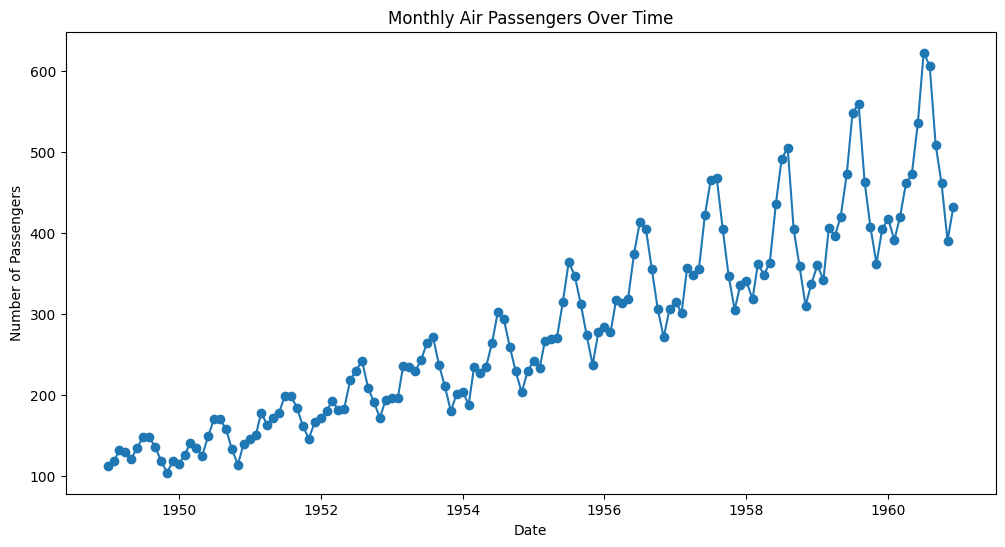

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['passengers'], marker='o')
plt.title('Monthly Air Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
# plt.grid(True)
plt.show()

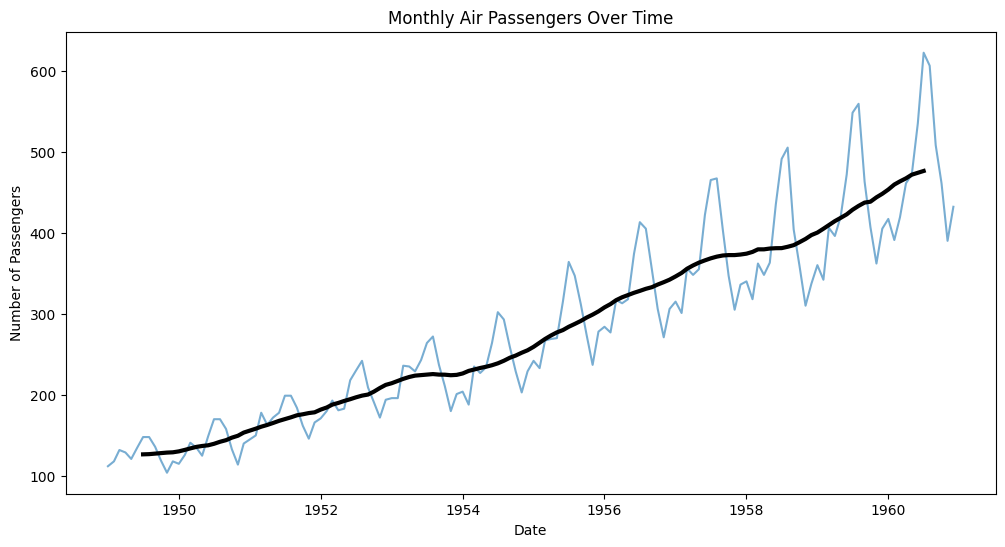

In [26]:
df['trend'] = df['passengers'].rolling(window=12, center=True).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['passengers'],alpha=0.6)
plt.plot(df.index,df['trend'], color='black',linewidth=3, label='12-month Trend')
plt.title('Monthly Air Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

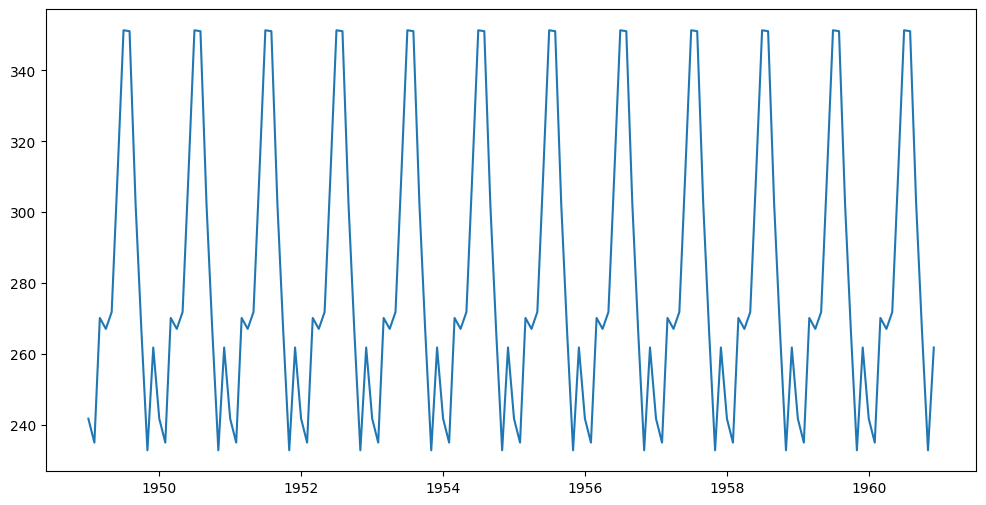

In [31]:
df['seasonality'] = df.groupby(df.index.month)['passengers'].transform('mean')
plt.figure(figsize=(12, 6))
plt.plot(df.index,df['seasonality'])
plt.show()